## East York, Toronto Geo Data

In [4]:
# Dependencies
import requests
import json
import time

import pandas as pd

# Import the API key
from config import geoapify_key

In [5]:
print(response)

NameError: name 'response' is not defined

In [6]:
%%time

# Set the geographical coordinates
latitude = 43.6912
longitude = -79.3417

# Set the parameters for the type of place
categories = "catering.cafe.coffee_shop"
# conditions = "access_limited.customers"
radius = 5000

# Set the parameters for the type of search
filters = f"circle:{longitude},{latitude},{radius}"
bias = f"proximity:{longitude},{latitude}"
limit = 500
offset = 0
# set up a parameters dictionary


# Set base URL
base_url = "https://api.geoapify.com/v2/places"

results = []
should_continue = True

while should_continue:
    params = {
        "categories":categories,
        "limit":limit,
        "offset": offset,
        "filter":filters,
        "bias":bias,
        "apiKey":geoapify_key    
    }
    # run a request using our params dictionary
    response = requests.get(base_url, params=params).json()
   
    if 'features' in response:
        num_features = len(response["features"])
        offset = offset + num_features
        results = results + response['features']
        print(f'got {num_features} features')
        
    if 'features' not in response or len(response['features'])==0:
        should_continue = False
    # pause    
    time.sleep(0.5)
print(f'got {len(results)} total features')
#coffee shop

got 167 features
got 0 features
got 167 total features
CPU times: user 44.5 ms, sys: 13.4 ms, total: 57.9 ms
Wall time: 3.49 s


In [7]:
#asdf
from pandas import json_normalize
# Convert the data into a Pandas DataFramef
EastYork_df = pd.json_normalize(results)
#list(EastYork_df)
EastYork_df

,type,properties.name,properties.country,properties.country_code,properties.state,properties.county,properties.city,properties.postcode,properties.district,properties.neighbourhood,...,properties.datasource.raw.store_ref,properties.datasource.raw.addr:country,properties.datasource.raw.self_service,properties.datasource.raw.toilets,properties.datasource.raw.toilets:access,properties.datasource.raw.branch,properties.datasource.raw.contact:facebook,properties.datasource.raw.description,properties.datasource.raw.internet_access:ssid,properties.datasource.raw.recycling:coffee_cups
0,Feature,Tim Hortons,Canada,ca,Ontario,Golden Horseshoe,Toronto,M4J 3S1,East York,Todmorden Village,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Feature,Starbucks,Canada,ca,Ontario,Golden Horseshoe,Toronto,M4C 2Z7,East York,Olde East York Village,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Feature,The One in the Only,Canada,ca,Ontario,Golden Horseshoe,Old Toronto,M4J 1L7,The Pocket,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Feature,Tim Hortons,Canada,ca,Ontario,Golden Horseshoe,Toronto,M4C 2Z7,East York,Olde East York Village,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Feature,Starbucks,Canada,ca,Ontario,Golden Horseshoe,Old Toronto,M4J 1L7,The Pocket,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,Feature,Tim Hortons,Canada,ca,Ontario,Golden Horseshoe,Old Toronto,M5A 2P7,St. Lawrence,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
163,Feature,Tim Hortons,Canada,ca,Ontario,Golden Horseshoe,Old Toronto,M5B 0A1,Downtown Yonge,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
164,Feature,Tim Hortons,Canada,ca,Ontario,Golden Horseshoe,Toronto,M1L 4T0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
165,Feature,Starbucks Reserve,Canada,ca,Ontario,Golden Horseshoe,Toronto,M3C 3R6,North York,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#Create a new dataDrame
EastYork_sub_df = EastYork_df[['properties.name',
                               'properties.datasource.raw.wheelchair',
                               'properties.datasource.raw.internet_access',
                               'properties.datasource.raw.takeaway']]

#EastYork_sub_df['properties.datasource.raw.takeaway'].value_counts(dropna=False)
EastYork_sub_df = EastYork_sub_df.reset_index()
EastYork_sub_df = EastYork_sub_df.rename(columns={'index': 'shop_id',
                                                  'properties.name':'name',
                                                  'properties.datasource.raw.wheelchair':'wheelchair', 
                                                  'properties.datasource.raw.internet_access':'internet_access', 
                                                  'properties.datasource.raw.takeaway':'takeaway' })

EastYork_sub_df['takeaway'] = EastYork_sub_df['takeaway'].fillna('no')
EastYork_sub_df['wheelchair'] = EastYork_sub_df['wheelchair'].fillna('not-available')
EastYork_sub_df['internet_access'] = EastYork_sub_df['internet_access'].fillna('not-available')

EastYork_sub_df.head()

,shop_id,name,wheelchair,internet_access,takeaway
0,0,Tim Hortons,not-available,not-available,yes
1,1,Starbucks,yes,not-available,yes
2,2,The One in the Only,not-available,not-available,no
3,3,Tim Hortons,not-available,not-available,yes
4,4,Starbucks,not-available,not-available,yes


In [9]:
EY_final_df = EastYork_sub_df.replace('wlan','yes')
EY_final_df

,shop_id,name,wheelchair,internet_access,takeaway
0,0,Tim Hortons,not-available,not-available,yes
1,1,Starbucks,yes,not-available,yes
2,2,The One in the Only,not-available,not-available,no
3,3,Tim Hortons,not-available,not-available,yes
4,4,Starbucks,not-available,not-available,yes
...,...,...,...,...,...
162,162,Tim Hortons,not-available,not-available,yes
163,163,Tim Hortons,yes,not-available,yes
164,164,Tim Hortons,not-available,not-available,yes
165,165,Starbucks Reserve,not-available,not-available,yes


In [10]:
#How many wheelchair are EY in total
wheelchair_EY = EY_final_df.loc[EY_final_df["wheelchair"] == "yes"]
number_wheelchair_EY = len(wheelchair_EY["wheelchair"])
number_wheelchair_EY

29

In [11]:
#How many cafes are EY in total
number_coffee = len(EY_final_df["shop_id"])
number_coffee

167

In [12]:
#How many internet_access are EY in total
internet_access_EY = EY_final_df.loc[EY_final_df["internet_access"] == "yes"]
number_internet_access_EY = len(internet_access_EY["internet_access"])
number_internet_access_EY

30

In [13]:
#How many takeaway are EY in total
takeaway_EY = EY_final_df.loc[EY_final_df["takeaway"] == "yes"]
number_takeaway_EY = len(takeaway_EY["takeaway"])
number_takeaway_EY

133

**Percentage of each amenities in the East York** 

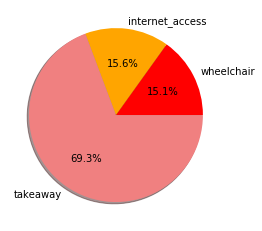

In [15]:
import matplotlib.pyplot as plt
import numpy as np
#Percentage of each facility in the East
# Labels for the sections of our pie chart
labels = ["wheelchair", "internet_access", "takeaway"]

# The values of each section of the pie chart
number_ey_am = [number_wheelchair_EY, number_internet_access_EY, number_takeaway_EY]

# The colors of each section of the pie chart
colors = ["red", "orange", "lightcoral"]

# Tells matplotlib to separate the "Humans" section from the others
explode = (0, 0, 0)


plt.pie(number_ey_am, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True)

plt.savefig("output_graph/pie_EastYork.png")

**Total number of each amenity in the East York**

In [16]:
EastYork_whole_data = {'District': ['East York'],
                       'coffe shops': number_coffee,
                       'Total wheelchair': number_wheelchair_EY, 
                       'Total internet_access': number_internet_access_EY, 
                       'Total takeaway': number_takeaway_EY}
EastYork_whole_df =pd.DataFrame(EastYork_whole_data)
EastYork_whole_df

,District,coffe shops,Total wheelchair,Total internet_access,Total takeaway
0,East York,167,29,30,133


In [17]:
#EastYork_sub_df['takeaway'] = EastYork_sub_df['takeaway'].fillna('no')
#EastYork_sub_df['wheelchair'] = EastYork_sub_df['wheelchair'].fillna('not-available')
#EastYork_sub_df['internet_access'] = EastYork_sub_df['internet_access'].fillna('not-available')
#EastYork_sub_df

In [18]:
#EastYork_sub_df['wheelchair'].unique()

In [19]:
#EastYork_sub_df['wheelchair'].value_counts(dropna=False)

## Etobicoke, Toronto Geo Data

In [20]:
# Import the API key
from config import geoapify_key

In [21]:
print(response)

{'type': 'FeatureCollection', 'features': []}


In [22]:
%%time
# Set the geographical coordinates
latitude = 43.6205
longitude = -79.5132

# Set the parameters for the type of place
categories = "catering.cafe.coffee_shop"
# conditions = "access_limited.customers"
radius = 11000

# Set the parameters for the type of search
filters = f"circle:{longitude},{latitude},{radius}"
bias = f"proximity:{longitude},{latitude}"
limit = 500
offset = 0
# set up a parameters dictionary


# Set base URL
base_url = "https://api.geoapify.com/v2/places"

results = []
should_continue = True

while should_continue:
    params = {
        "categories":categories,
        "limit":limit,
        "offset": offset,
        "filter":filters,
        "bias":bias,
        "apiKey":geoapify_key    
    }
    # run a request using our params dictionary
    response = requests.get(base_url, params=params).json()
    if 'features' in response:
        num_features = len(response["features"])
        offset = offset + num_features
        results = results + response['features']
        print(f'got {num_features} features')
        
    if 'features' not in response or len(response['features'])==0:
        should_continue = False
    # pause    
    time.sleep(0.5)
print(f'got {len(results)} total features')

got 358 features
got 0 features
got 358 total features
CPU times: user 49 ms, sys: 8.61 ms, total: 57.7 ms
Wall time: 5.13 s


In [23]:
from pandas import json_normalize
# Convert the data into a Pandas DataFramef
Etobicoke_df = pd.json_normalize(results)
#list(Etobicoke_df)
Etobicoke_df

,type,properties.name,properties.country,properties.country_code,properties.state,properties.county,properties.city,properties.postcode,properties.district,properties.suburb,...,properties.datasource.raw.floor,properties.datasource.raw.hst_number,properties.datasource.raw.name:it,properties.datasource.raw.self_checkout,properties.datasource.raw.toilets,properties.datasource.raw.seating_area,properties.datasource.raw.capacity,properties.datasource.raw.store_name,properties.datasource.raw.operator:wikidata,properties.datasource.raw.operator:wikipedia
0,Feature,Tim Hortons,Canada,ca,Ontario,Golden Horseshoe,Toronto,M8Z 6C7,The Queensway,Etobicoke,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Feature,Tim Hortons,Canada,ca,Ontario,Golden Horseshoe,Toronto,M8Z 6C7,The Queensway,Etobicoke,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Feature,Tim Hortons,Canada,ca,Ontario,Golden Horseshoe,Toronto,M8Z 1N5,The Queensway,Etobicoke,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Feature,Starbucks,Canada,ca,Ontario,Golden Horseshoe,Toronto,M8Z 1N5,The Queensway,Etobicoke,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Feature,Tim Hortons,Canada,ca,Ontario,Golden Horseshoe,Toronto,M8Z 1K5,NaN,Etobicoke,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,Feature,Tim Hortons,Canada,ca,Ontario,Golden Horseshoe,Old Toronto,M5S 1B2,Discovery District,University—Rosedale,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
354,Feature,McCafé,Canada,ca,Ontario,Golden Horseshoe,Old Toronto,M5J 1E6,South Core,Spadina—Fort York,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Union McCafe,Q38076,en:McDonald's
355,Feature,Tim Hortons,Canada,ca,Ontario,Peel Region,Mississauga,L5B 1M7,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356,Feature,AMPM Coffee,Canada,ca,Ontario,Golden Horseshoe,Old Toronto,M5J 2T5,Harbourfront,Spadina—Fort York,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
#Create a new DataFrame
Etobicoke_sub_df = Etobicoke_df[['properties.name',
                               'properties.datasource.raw.wheelchair',
                               'properties.datasource.raw.internet_access',
                               'properties.datasource.raw.takeaway']]

Etobicoke_sub_df = Etobicoke_sub_df.reset_index()
Etobicoke_sub_df = Etobicoke_sub_df.rename(columns={'index': 'shop_id',
                                                  'properties.name':'name',
                                                  'properties.datasource.raw.wheelchair':'wheelchair', 
                                                  'properties.datasource.raw.internet_access':'internet_access', 
                                                  'properties.datasource.raw.takeaway':'takeaway' })

Etobicoke_sub_df['takeaway'] = Etobicoke_sub_df['takeaway'].fillna('no')
Etobicoke_sub_df['wheelchair'] = Etobicoke_sub_df['wheelchair'].fillna('not-available')
Etobicoke_sub_df['internet_access'] = Etobicoke_sub_df['internet_access'].fillna('not-available')

Etobicoke_sub_df.head()

,shop_id,name,wheelchair,internet_access,takeaway
0,0,Tim Hortons,not-available,not-available,yes
1,1,Tim Hortons,not-available,not-available,yes
2,2,Tim Hortons,not-available,not-available,yes
3,3,Starbucks,not-available,wlan,yes
4,4,Tim Hortons,not-available,not-available,yes


In [25]:
Etobicoke_final_df = Etobicoke_sub_df.replace('wlan','yes')
Etobicoke_final_df.head()

,shop_id,name,wheelchair,internet_access,takeaway
0,0,Tim Hortons,not-available,not-available,yes
1,1,Tim Hortons,not-available,not-available,yes
2,2,Tim Hortons,not-available,not-available,yes
3,3,Starbucks,not-available,yes,yes
4,4,Tim Hortons,not-available,not-available,yes


In [26]:
#How many cafes are Etobicoke in total
number_coffee_Et = len(Etobicoke_final_df["shop_id"])
print(number_coffee_Et)

#How many wheelchair are Etobicoke in total
wheelchair_Et = Etobicoke_final_df.loc[Etobicoke_final_df["wheelchair"] == "yes"]
number_wheelchair_Et = len(wheelchair_Et["wheelchair"])
print(number_wheelchair_Et)

#How many internet_access are Etobicoke in total
internet_access_Et = Etobicoke_final_df.loc[Etobicoke_final_df["internet_access"] == "yes"]
number_internet_access_Et = len(internet_access_Et["internet_access"])
print(number_internet_access_Et)

#How many takeaway are Etobicoke in total
takeaway_Et = Etobicoke_final_df.loc[Etobicoke_final_df["takeaway"] == "yes"]
number_takeaway_Et = len(takeaway_Et["takeaway"])
print(number_takeaway_Et)

358
40
53
280


**Percentage of each amenities in Etobicoke**

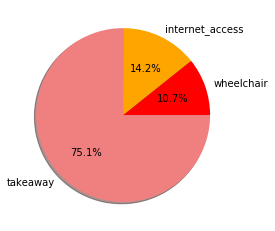

In [29]:
import matplotlib.pyplot as plt
import numpy as np
#Percentage of each facility in the East
# Labels for the sections of our pie chart
labels = ["wheelchair", "internet_access", "takeaway"]

# The values of each section of the pie chart
number_et_am = [number_wheelchair_Et, number_internet_access_Et, number_takeaway_Et]

# The colors of each section of the pie chart
colors = ["red", "orange", "lightcoral"]

# Tells matplotlib to separate the "Humans" section from the others
explode = (0, 0, 0)


plt.pie(number_et_am, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True)

plt.savefig("output_graph/pie_Etobicoke.png")

**Total number of each amenity in the Etobicoke**

In [30]:
Etobicoke_whole_data = {'District': ["East York", "Etobicoke"],
                        'coffe shops': [number_coffee,number_coffee_Et],
                        'Total wheelchair': [number_wheelchair_EY,number_wheelchair_Et], 
                        'Total internet_access': [number_internet_access_EY,number_internet_access_Et], 
                        'Total takeaway': [number_takeaway_EY, number_takeaway_Et]}
Etobicoke_whole_df =pd.DataFrame(Etobicoke_whole_data)
Etobicoke_whole_df

,District,coffe shops,Total wheelchair,Total internet_access,Total takeaway
0,East York,167,29,30,133
1,Etobicoke,358,40,53,280


## North York, Toronto Geo Data

In [31]:
# Import the API key
from config import geoapify_key

In [32]:
print(response)

{'type': 'FeatureCollection', 'features': []}


In [33]:
%%time
# Set the geographical coordinates
latitude = 43.7615
longitude = -79.4111

# Set the parameters for the type of place
categories = "catering.cafe.coffee_shop"
# conditions = "access_limited.customers"
radius = 13000

# Set the parameters for the type of search
filters = f"circle:{longitude},{latitude},{radius}"
bias = f"proximity:{longitude},{latitude}"
limit = 500
offset = 0
# set up a parameters dictionary


# Set base URL
base_url = "https://api.geoapify.com/v2/places"

results = []
should_continue = True

while should_continue:
    params = {
        "categories":categories,
        "limit":limit,
        "offset": offset,
        "filter":filters,
        "bias":bias,
        "apiKey":geoapify_key    
    }
    # run a request using our params dictionary
    response = requests.get(base_url, params=params).json()
    if 'features' in response:
        num_features = len(response["features"])
        offset = offset + num_features
        results = results + response['features']
        print(f'got {num_features} features')
        
    if 'features' not in response or len(response['features'])==0:
        should_continue = False
    # pause    
    time.sleep(0.5)
print(f'got {len(results)} total features')

got 500 features
got 141 features
got 0 features
got 641 total features
CPU times: user 75.3 ms, sys: 12.5 ms, total: 87.7 ms
Wall time: 8.91 s


In [34]:
from pandas import json_normalize
# Convert the data into a Pandas DataFramef
NorthYork_df = pd.json_normalize(results)
#list(NorthYork_df)
NorthYork_df

,type,properties.name,properties.country,properties.country_code,properties.state,properties.county,properties.city,properties.postcode,properties.district,properties.suburb,...,properties.datasource.raw.payment:amex,properties.datasource.raw.payment:notes,properties.datasource.raw.bar,properties.datasource.raw.diet:meat,properties.datasource.raw.reservation,properties.datasource.raw.newspapers,properties.datasource.raw.layer,properties.datasource.raw.addr:place,properties.datasource.raw.capacity_1,properties.datasource.raw.postal_code
0,Feature,Tim Hortons,Canada,ca,Ontario,Golden Horseshoe,Toronto,M2N 6G5,North York,North York,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Feature,Tim Hortons,Canada,ca,Ontario,Golden Horseshoe,Toronto,M2N 5X2,North York,North York,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Feature,Second Cup,Canada,ca,Ontario,Golden Horseshoe,Toronto,M2N 5X2,North York,North York,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Feature,Country Style,Canada,ca,Ontario,Golden Horseshoe,Toronto,M2N 5W9,North York,North York,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Feature,Tim Hortons,Canada,ca,Ontario,Golden Horseshoe,Toronto,M2N 5M2,North York,North York,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636,Feature,Starbucks,Canada,ca,Ontario,Golden Horseshoe,Toronto,M1S 3P6,Malvern West,Scarborough,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
637,Feature,St. Lawrence Cafe,Canada,ca,Ontario,Golden Horseshoe,Old Toronto,M5A 4J5,St. Lawrence,Toronto Centre,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
638,Feature,Tim Hortons,Canada,ca,Ontario,Golden Horseshoe,Old Toronto,M5E 1M2,King East,Toronto Centre,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
639,Feature,Tim Hortons,Canada,ca,Ontario,Golden Horseshoe,Old Toronto,M5J 2S1,Financial District,Spadina—Fort York,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
#Create a new DataFrame
NorthYork_sub_df = NorthYork_df[['properties.name',
                               'properties.datasource.raw.wheelchair',
                               'properties.datasource.raw.internet_access',
                               'properties.datasource.raw.takeaway']]

NorthYork_sub_df = NorthYork_sub_df.reset_index()
NorthYork_sub_df = NorthYork_sub_df.rename(columns={'index': 'shop_id',
                                                  'properties.name':'name',
                                                  'properties.datasource.raw.wheelchair':'wheelchair', 
                                                  'properties.datasource.raw.internet_access':'internet_access', 
                                                  'properties.datasource.raw.takeaway':'takeaway' })

NorthYork_sub_df['takeaway'] = NorthYork_sub_df['takeaway'].fillna('no')
NorthYork_sub_df['wheelchair'] = NorthYork_sub_df['wheelchair'].fillna('not-available')
NorthYork_sub_df['internet_access'] = NorthYork_sub_df['internet_access'].fillna('not-available')

NorthYork_sub_df.head()

,shop_id,name,wheelchair,internet_access,takeaway
0,0,Tim Hortons,not-available,not-available,yes
1,1,Tim Hortons,not-available,not-available,yes
2,2,Second Cup,not-available,not-available,yes
3,3,Country Style,not-available,not-available,yes
4,4,Tim Hortons,not-available,not-available,yes


In [36]:
NorthYork_final_df = NorthYork_sub_df.replace('wlan','yes')
NorthYork_final_df.head()

,shop_id,name,wheelchair,internet_access,takeaway
0,0,Tim Hortons,not-available,not-available,yes
1,1,Tim Hortons,not-available,not-available,yes
2,2,Second Cup,not-available,not-available,yes
3,3,Country Style,not-available,not-available,yes
4,4,Tim Hortons,not-available,not-available,yes


In [37]:
#How many cafes are Etobicoke in total
number_coffee_Ny = len(NorthYork_final_df["shop_id"])
print(number_coffee_Ny)

#How many wheelchair are Etobicoke in total
wheelchair_Ny = NorthYork_final_df.loc[NorthYork_final_df["wheelchair"] == "yes"]
number_wheelchair_Ny = len(wheelchair_Ny["wheelchair"])
print(number_wheelchair_Ny)

#How many internet_access are Etobicoke in total
internet_access_Ny = NorthYork_final_df.loc[NorthYork_final_df["internet_access"] == "yes"]
number_internet_access_Ny = len(internet_access_Ny["internet_access"])
print(number_internet_access_Ny)

#How many takeaway are Etobicoke in total
takeaway_Ny = NorthYork_final_df.loc[NorthYork_final_df["takeaway"] == "yes"]
number_takeaway_Ny = len(takeaway_Ny["takeaway"])
print(number_takeaway_Ny)

641
85
87
542


**Percentage of each amenities in North York**

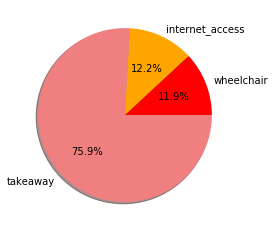

In [38]:
import matplotlib.pyplot as plt
import numpy as np
#Percentage of each facility in the East
# Labels for the sections of our pie chart
labels = ["wheelchair", "internet_access", "takeaway"]

# The values of each section of the pie chart
number_ny_am = [number_wheelchair_Ny, number_internet_access_Ny, number_takeaway_Ny]

# The colors of each section of the pie chart
colors = ["red", "orange", "lightcoral"]

# Tells matplotlib to separate the "Humans" section from the others
explode = (0, 0, 0)


plt.pie(number_ny_am, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True)

plt.savefig("output_graph/pie_NorthYork.png")

**Total number of each amenity in North York**

In [39]:
NorthYork_whole_data = {'District':["East York", "Etobicoke","NorthYork"],
                        'coffe shops': [number_coffee,number_coffee_Et, number_coffee_Ny],
                        'Total wheelchair': [number_wheelchair_EY, number_wheelchair_Et, number_wheelchair_Ny], 
                        'Total internet_access': [number_internet_access_EY,number_internet_access_Et, number_internet_access_Ny], 
                        'Total takeaway': [number_takeaway_EY, number_takeaway_Et, number_takeaway_Ny]}
NorthYork_whole_df =pd.DataFrame(NorthYork_whole_data)
NorthYork_whole_df

,District,coffe shops,Total wheelchair,Total internet_access,Total takeaway
0,East York,167,29,30,133
1,Etobicoke,358,40,53,280
2,NorthYork,641,85,87,542


## Scarborough, Toronto Geo Data

In [40]:
# Import the API key
from config import geoapify_key

In [41]:
print(response)

{'type': 'FeatureCollection', 'features': []}


In [42]:
# Set the geographical coordinates for 
latitude = 43.7764
longitude = -79.2318

# Set the parameters for the type of place
categories = "catering.cafe.coffee_shop"
# conditions = "access_limited.customers"
radius = 13700

# Set the parameters for the type of search
filters = f"circle:{longitude},{latitude},{radius}"
bias = f"proximity:{longitude},{latitude}"
limit = 500
offset = 0
# set up a parameters dictionary


# Set base URL
base_url = "https://api.geoapify.com/v2/places"

results = []
should_continue = True

while should_continue:
    params = {
        "categories":categories,
        "limit":limit,
        "offset": offset,
        "filter":filters,
        "bias":bias,
        "apiKey":geoapify_key    
    }
    # run a request using our params dictionary
    response = requests.get(base_url, params=params).json()
    if 'features' in response:
        num_features = len(response["features"])
        offset = offset + num_features
        results = results + response['features']
        print(f'got {num_features} features')
        
    if 'features' not in response or len(response['features'])==0:
        should_continue = False
    # pause    
    time.sleep(0.5)
print(f'got {len(results)} total features')

got 209 features
got 0 features
got 209 total features


In [43]:
from pandas import json_normalize
# Convert the data into a Pandas DataFramef
Scarborough_df = pd.json_normalize(results)
#list(Scarborough_df)
Scarborough_df

,type,properties.name,properties.country,properties.country_code,properties.state,properties.county,properties.city,properties.postcode,properties.suburb,properties.quarter,...,properties.datasource.raw.internet_access:fee,properties.datasource.raw.stars,properties.datasource.raw.stars:system,properties.municipality,properties.datasource.raw.washrooms,properties.commercial,properties.datasource.raw.branch,properties.datasource.raw.contact:facebook,properties.datasource.raw.seating,properties.datasource.raw.delivery
0,Feature,Tim Hortons,Canada,ca,Ontario,Golden Horseshoe,Toronto,M1H 3B7,Scarborough,Scarborough—Guildwood,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Feature,Coffee culture,Canada,ca,Ontario,Golden Horseshoe,Toronto,M1H 3B7,Scarborough,Scarborough—Guildwood,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Feature,Tim Hortons,Canada,ca,Ontario,Golden Horseshoe,Toronto,M1H 3B4,Scarborough,Scarborough—Guildwood,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Feature,Coffee Time,Canada,ca,Ontario,Golden Horseshoe,Toronto,M1H 1H2,Scarborough,Scarborough—Guildwood,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Feature,Marley Coffee,Canada,ca,Ontario,Golden Horseshoe,Toronto,M1G 3T8,Scarborough,Scarborough—Guildwood,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,Feature,Tim Hortons,Canada,ca,Ontario,Durham Region,Pickering,L1V 3B4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
205,Feature,Lazy Daisy's,Canada,ca,Ontario,Golden Horseshoe,Old Toronto,M4L 1Y9,Toronto—Danforth,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
206,Feature,Tim Hortons,Canada,ca,Ontario,Golden Horseshoe,Toronto,M2N 3B1,North York,Willowdale,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
207,Feature,Tim Hortons,Canada,ca,Ontario,York Region,Markham,L3R 6C9,Buttonville,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN


In [44]:
#Create a new DataFrame
Scarborough_sub_df = Scarborough_df[['properties.name',
                               'properties.datasource.raw.wheelchair',
                               'properties.datasource.raw.internet_access',
                               'properties.datasource.raw.takeaway']]

Scarborough_sub_df = Scarborough_sub_df.reset_index()
Scarborough_sub_df = Scarborough_sub_df.rename(columns={'index': 'shop_id',
                                                  'properties.name':'name',
                                                  'properties.datasource.raw.wheelchair':'wheelchair', 
                                                  'properties.datasource.raw.internet_access':'internet_access', 
                                                  'properties.datasource.raw.takeaway':'takeaway' })

Scarborough_sub_df['takeaway'] = Scarborough_sub_df['takeaway'].fillna('no')
Scarborough_sub_df['wheelchair'] = Scarborough_sub_df['wheelchair'].fillna('not-available')
Scarborough_sub_df['internet_access'] = Scarborough_sub_df['internet_access'].fillna('not-available')

Scarborough_sub_df.head()

,shop_id,name,wheelchair,internet_access,takeaway
0,0,Tim Hortons,not-available,not-available,yes
1,1,Coffee culture,not-available,not-available,yes
2,2,Tim Hortons,not-available,not-available,yes
3,3,Coffee Time,not-available,not-available,yes
4,4,Marley Coffee,not-available,not-available,no


In [45]:
Scarborough_final_df = Scarborough_sub_df.replace('wlan','yes')
Scarborough_final_df.head()

,shop_id,name,wheelchair,internet_access,takeaway
0,0,Tim Hortons,not-available,not-available,yes
1,1,Coffee culture,not-available,not-available,yes
2,2,Tim Hortons,not-available,not-available,yes
3,3,Coffee Time,not-available,not-available,yes
4,4,Marley Coffee,not-available,not-available,no


In [46]:
#How many cafes are Etobicoke in total
number_coffee_Sc = len(Scarborough_final_df["shop_id"])
print(number_coffee_Sc)

#How many wheelchair are Etobicoke in total
wheelchair_Sc = Scarborough_final_df.loc[Scarborough_final_df["wheelchair"] == "yes"]
number_wheelchair_Sc = len(wheelchair_Sc["wheelchair"])
print(number_wheelchair_Sc)

#How many internet_access are Etobicoke in total
internet_access_Sc = Scarborough_final_df.loc[Scarborough_final_df["internet_access"] == "yes"]
number_internet_access_Sc = len(internet_access_Sc["internet_access"])
print(number_internet_access_Sc)

#How many takeaway are Etobicoke in total
takeaway_Sc = Scarborough_final_df.loc[Scarborough_final_df["takeaway"] == "yes"]
number_takeaway_Sc = len(takeaway_Sc["takeaway"])
print(number_takeaway_Sc)

209
17
15
201


**Percentage of each amenities in Scarborough**

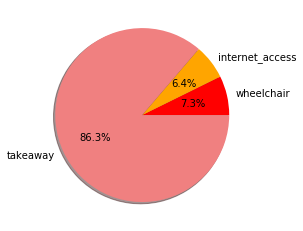

In [47]:
import matplotlib.pyplot as plt
import numpy as np
#Percentage of each facility in the East
# Labels for the sections of our pie chart
labels = ["wheelchair", "internet_access", "takeaway"]

# The values of each section of the pie chart
number_sc_am = [number_wheelchair_Sc, number_internet_access_Sc, number_takeaway_Sc]

# The colors of each section of the pie chart
colors = ["red", "orange", "lightcoral"]

# Tells matplotlib to separate the "Humans" section from the others
explode = (0, 0, 0)


plt.pie(number_sc_am, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True)

plt.savefig("output_graph/pie_Scarborough.png")

**Total number of each amenity in Scarborough**

In [48]:
Scarborough_whole_data = {'District': ["East York", "Etobicoke","NorthYork","Scarborough"],
                          'coffe shops': [number_coffee,number_coffee_Et, number_coffee_Ny, number_coffee_Sc],
                          'Total wheelchair': [number_wheelchair_EY, number_wheelchair_Et, number_wheelchair_Ny, number_wheelchair_Sc], 
                          'Total internet_access': [number_internet_access_EY,number_internet_access_Et, number_internet_access_Ny, number_internet_access_Sc], 
                          'Total takeaway': [number_takeaway_EY, number_takeaway_Et, number_takeaway_Ny, number_takeaway_Sc]}
Scarborough_whole_df =pd.DataFrame(Scarborough_whole_data)
Scarborough_whole_df

,District,coffe shops,Total wheelchair,Total internet_access,Total takeaway
0,East York,167,29,30,133
1,Etobicoke,358,40,53,280
2,NorthYork,641,85,87,542
3,Scarborough,209,17,15,201


## Downtown Toronto, Toronto Geo Data

In [49]:
# Import the API key
from config import geoapify_key

In [50]:
print(response)

{'type': 'FeatureCollection', 'features': []}


In [51]:
%%time
# Set the geographical coordinates  
latitude = 43.6548
longitude = -79.3883

# Set the parameters for the type of place
categories = "catering.cafe.coffee_shop"
# conditions = "access_limited.customers"
radius = 4100

# Set the parameters for the type of search
filters = f"circle:{longitude},{latitude},{radius}"
bias = f"proximity:{longitude},{latitude}"
limit = 500
offset = 0
# set up a parameters dictionary


# Set base URL
base_url = "https://api.geoapify.com/v2/places"

results = []
should_continue = True

while should_continue:
    params = {
        "categories":categories,
        "limit":limit,
        "offset": offset,
        "filter":filters,
        "bias":bias,
        "apiKey":geoapify_key    
    }
    # run a request using our params dictionary
    response = requests.get(base_url, params=params).json()
    if 'features' in response:
        num_features = len(response["features"])
        offset = offset + num_features
        results = results + response['features']
        print(f'got {num_features} features')
        
    if 'features' not in response or len(response['features'])==0:
        should_continue = False
    # pause    
    time.sleep(0.5)
print(f'got {len(results)} total features')

got 332 features
got 0 features
got 332 total features
CPU times: user 42.2 ms, sys: 6.31 ms, total: 48.5 ms
Wall time: 4.03 s


In [52]:
from pandas import json_normalize
# Convert the data into a Pandas DataFramef
Downtown_df = pd.json_normalize(results)
#list(Downtown_df)
Downtown_df

,type,properties.name,properties.country,properties.country_code,properties.state,properties.county,properties.city,properties.postcode,properties.district,properties.suburb,...,properties.datasource.raw.wlan,properties.datasource.raw.drink:espresso,properties.datasource.raw.building,properties.datasource.raw.name:fr,properties.datasource.raw.building:levels,properties.datasource.raw.contact:instagram,properties.datasource.raw.newspapers,properties.datasource.raw.check_date,properties.neighbourhood,properties.datasource.raw.payment:gift_card
0,Feature,Tim Hortons,Canada,ca,Ontario,Golden Horseshoe,Old Toronto,M5T 2W5,Entertainment District,Spadina—Fort York,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Feature,Tim Hortons,Canada,ca,Ontario,Golden Horseshoe,Old Toronto,M5G 1E2,Discovery District,University—Rosedale,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Feature,Timothy's,Canada,ca,Ontario,Golden Horseshoe,Old Toronto,M5G 1E6,Queen West,Spadina—Fort York,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Feature,Starbucks,Canada,ca,Ontario,Golden Horseshoe,Old Toronto,M5G 1X3,Discovery District,University—Rosedale,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Feature,Timothy's,Canada,ca,Ontario,Golden Horseshoe,Old Toronto,M5G 1X3,Discovery District,University—Rosedale,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,Feature,The Tempered Room,Canada,ca,Ontario,Golden Horseshoe,Old Toronto,M6K 1M1,NaN,Parkdale—High Park,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
328,Feature,Tim Hortons,Canada,ca,Ontario,Golden Horseshoe,Old Toronto,M4K 1P6,Greektown,Toronto—Danforth,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-11-03,NaN,NaN
329,Feature,Capital Espresso,Canada,ca,Ontario,Golden Horseshoe,Old Toronto,M6K 1M1,NaN,Parkdale—High Park,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
330,Feature,Tim Hortons,Canada,ca,Ontario,Golden Horseshoe,Old Toronto,M6C 1A6,Hillcrest Village,Toronto—St. Paul's,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
#Create a new DataFrame
Downtown_sub_df = Downtown_df[['properties.name',
                               'properties.datasource.raw.wheelchair',
                               'properties.datasource.raw.internet_access',
                               'properties.datasource.raw.takeaway']]

Downtown_sub_df = Downtown_sub_df.reset_index()
Downtown_sub_df = Downtown_sub_df.rename(columns={'index': 'shop_id',
                                                  'properties.name':'name',
                                                  'properties.datasource.raw.wheelchair':'wheelchair', 
                                                  'properties.datasource.raw.internet_access':'internet_access', 
                                                  'properties.datasource.raw.takeaway':'takeaway' })

Downtown_sub_df['takeaway'] = Downtown_sub_df['takeaway'].fillna('no')
Downtown_sub_df['wheelchair'] = Downtown_sub_df['wheelchair'].fillna('not-available')
Downtown_sub_df['internet_access'] = Downtown_sub_df['internet_access'].fillna('not-available')

Downtown_sub_df.head()

,shop_id,name,wheelchair,internet_access,takeaway
0,0,Tim Hortons,not-available,not-available,yes
1,1,Tim Hortons,not-available,not-available,yes
2,2,Timothy's,not-available,not-available,yes
3,3,Starbucks,not-available,not-available,yes
4,4,Timothy's,not-available,not-available,yes


In [54]:
Downtown_final_df = Downtown_sub_df.replace('wlan','yes')
Downtown_final_df.head()

,shop_id,name,wheelchair,internet_access,takeaway
0,0,Tim Hortons,not-available,not-available,yes
1,1,Tim Hortons,not-available,not-available,yes
2,2,Timothy's,not-available,not-available,yes
3,3,Starbucks,not-available,not-available,yes
4,4,Timothy's,not-available,not-available,yes


In [55]:
#How many cafes are Etobicoke in total
number_coffee_Dt = len(Downtown_final_df["shop_id"])
print(number_coffee_Dt)

#How many wheelchair are Etobicoke in total
wheelchair_Dt = Downtown_final_df.loc[Downtown_final_df["wheelchair"] == "yes"]
number_wheelchair_Dt = len(wheelchair_Dt["wheelchair"])
print(number_wheelchair_Dt)

#How many internet_access are Etobicoke in total
internet_access_Dt = Downtown_final_df.loc[Downtown_final_df["internet_access"] == "yes"]
number_internet_access_Dt = len(internet_access_Dt["internet_access"])
print(number_internet_access_Dt)

#How many takeaway are Etobicoke in total
takeaway_Dt = Downtown_final_df.loc[Downtown_final_df["takeaway"] == "yes"]
number_takeaway_Dt = len(takeaway_Dt["takeaway"])
print(number_takeaway_Dt)

332
77
49
246


**Percentage of each amenities in Downtown**

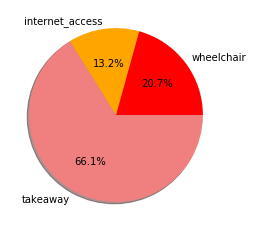

In [56]:
import matplotlib.pyplot as plt
import numpy as np
#Percentage of each facility in the East
# Labels for the sections of our pie chart
labels = ["wheelchair", "internet_access", "takeaway"]

# The values of each section of the pie chart
number_dt_am = [number_wheelchair_Dt, number_internet_access_Dt, number_takeaway_Dt]

# The colors of each section of the pie chart
colors = ["red", "orange", "lightcoral"]

# Tells matplotlib to separate the "Humans" section from the others
explode = (0, 0, 0)


plt.pie(number_dt_am, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True)

plt.savefig("output_graph/pie_Downtown.png")

**Total number of each amenity in Downtown**

In [57]:
Downtown_whole_data = {'District':["East York", "Etobicoke","NorthYork","Scarborough", "Downtown"],
                       'coffe shops': [number_coffee,number_coffee_Et, number_coffee_Ny, number_coffee_Sc, number_coffee_Dt],
                       'Total wheelchair': [number_wheelchair_EY, number_wheelchair_Et, number_wheelchair_Ny, number_wheelchair_Sc, number_wheelchair_Dt], 
                       'Total internet_access': [number_internet_access_EY,number_internet_access_Et, number_internet_access_Ny, number_internet_access_Sc, number_internet_access_Dt], 
                       'Total takeaway': [number_takeaway_EY, number_takeaway_Et, number_takeaway_Ny, number_takeaway_Sc, number_takeaway_Dt]}
Downtown_whole_df =pd.DataFrame(Downtown_whole_data)
Downtown_whole_df

,District,coffe shops,Total wheelchair,Total internet_access,Total takeaway
0,East York,167,29,30,133
1,Etobicoke,358,40,53,280
2,NorthYork,641,85,87,542
3,Scarborough,209,17,15,201
4,Downtown,332,77,49,246


## York, Toronto Geo Data

In [58]:
# Import the API key
from config import geoapify_key

In [59]:
print(response)

{'type': 'FeatureCollection', 'features': []}


In [60]:
# Set the geographical coordinates  
latitude = 43.6957
longitude = -79.4504

# Set the parameters for the type of place
categories = "catering.cafe.coffee_shop"
# conditions = "access_limited.customers"
radius = 5800

# Set the parameters for the type of search
filters = f"circle:{longitude},{latitude},{radius}"
bias = f"proximity:{longitude},{latitude}"
limit = 500
offset = 0
# set up a parameters dictionary


# Set base URL
base_url = "https://api.geoapify.com/v2/places"

results = []
should_continue = True

while should_continue:
    params = {
        "categories":categories,
        "limit":limit,
        "offset": offset,
        "filter":filters,
        "bias":bias,
        "apiKey":geoapify_key    
    }
    # run a request using our params dictionary
    response = requests.get(base_url, params=params).json()
    if 'features' in response:
        num_features = len(response["features"])
        offset = offset + num_features
        results = results + response['features']
        print(f'got {num_features} features')
        
    if 'features' not in response or len(response['features'])==0:
        should_continue = False
    # pause    
    time.sleep(0.5)
print(f'got {len(results)} total features')

got 174 features
got 0 features
got 174 total features


In [61]:
from pandas import json_normalize
# Convert the data into a Pandas DataFramef
York_df = pd.json_normalize(results)
#list(York_df)
York_df

,type,properties.name,properties.country,properties.country_code,properties.state,properties.county,properties.city,properties.postcode,properties.district,properties.suburb,...,properties.datasource.raw.drink:espresso,properties.datasource.raw.newspapers,properties.datasource.raw.addr:unit,properties.datasource.raw.email,properties.datasource.raw.postal_code,properties.datasource.raw.description,properties.datasource.raw.self_checkout,properties.datasource.raw.floor,properties.datasource.raw.operator,properties.datasource.raw.former_name
0,Feature,Tim Hortons,Canada,ca,Ontario,Golden Horseshoe,Toronto,M6E 2J3,Fairbank,York,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Feature,Tim Hortons,Canada,ca,Ontario,Golden Horseshoe,Toronto,M6B 4J3,Fairbank,York,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Feature,Coffee Time,Canada,ca,Ontario,Golden Horseshoe,Toronto,M6C 2E5,Little Jamaica,York,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Feature,Starbucks,Canada,ca,Ontario,Golden Horseshoe,Toronto,M6B 3X7,NaN,York,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Feature,Tim Hortons,Canada,ca,Ontario,Golden Horseshoe,Toronto,M6B 3X8,North York,York,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,Feature,Tim Hortons,Canada,ca,Ontario,Golden Horseshoe,Old Toronto,M4Y 2T1,Yorkville,University—Rosedale,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
170,Feature,Starbucks,Canada,ca,Ontario,Golden Horseshoe,Old Toronto,M4W 3L8,Yorkville,University—Rosedale,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
171,Feature,Bellwoods Coffee + Gelato,Canada,ca,Ontario,Golden Horseshoe,Old Toronto,M6J 1W1,Bellwoods,University—Rosedale,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
172,Feature,Starbucks,Canada,ca,Ontario,Golden Horseshoe,Toronto,M4N 2N5,North York,Don Valley West,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
#Create a new DataFrame
York_sub_df = York_df[['properties.name',
                               'properties.datasource.raw.wheelchair',
                               'properties.datasource.raw.internet_access',
                               'properties.datasource.raw.takeaway']]

York_sub_df = York_sub_df.reset_index()
York_sub_df = York_sub_df.rename(columns={'index': 'shop_id',
                                                  'properties.name':'name',
                                                  'properties.datasource.raw.wheelchair':'wheelchair', 
                                                  'properties.datasource.raw.internet_access':'internet_access', 
                                                  'properties.datasource.raw.takeaway':'takeaway' })

York_sub_df['takeaway'] = York_sub_df['takeaway'].fillna('no')
York_sub_df['wheelchair'] = York_sub_df['wheelchair'].fillna('not-available')
York_sub_df['internet_access'] = York_sub_df['internet_access'].fillna('not-available')

York_sub_df.head()

,shop_id,name,wheelchair,internet_access,takeaway
0,0,Tim Hortons,not-available,not-available,yes
1,1,Tim Hortons,not-available,not-available,yes
2,2,Coffee Time,not-available,not-available,yes
3,3,Starbucks,not-available,wlan,yes
4,4,Tim Hortons,not-available,yes,yes


In [63]:
York_final_df = York_sub_df.replace('wlan','yes')
York_final_df.head()

,shop_id,name,wheelchair,internet_access,takeaway
0,0,Tim Hortons,not-available,not-available,yes
1,1,Tim Hortons,not-available,not-available,yes
2,2,Coffee Time,not-available,not-available,yes
3,3,Starbucks,not-available,yes,yes
4,4,Tim Hortons,not-available,yes,yes


In [64]:
#How many cafes are Etobicoke in total
number_coffee_Yk = len(York_final_df["shop_id"])
print(number_coffee_Yk)

#How many wheelchair are Etobicoke in total
wheelchair_Yk = York_final_df.loc[York_final_df["wheelchair"] == "yes"]
number_wheelchair_Yk = len(wheelchair_Yk["wheelchair"])
print(number_wheelchair_Yk)

#How many internet_access are Etobicoke in total
internet_access_Yk = York_final_df.loc[York_final_df["internet_access"] == "yes"]
number_internet_access_Yk = len(internet_access_Yk["internet_access"])
print(number_internet_access_Yk)

#How many takeaway are Etobicoke in total
takeaway_Yk = York_final_df.loc[York_final_df["takeaway"] == "yes"]
number_takeaway_Yk = len(takeaway_Yk["takeaway"])
print(number_takeaway_Yk)

174
20
32
134


**Percentage of each amenities in York**

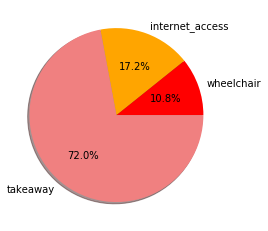

In [65]:
import matplotlib.pyplot as plt
import numpy as np
#Percentage of each facility in the East
# Labels for the sections of our pie chart
labels = ["wheelchair", "internet_access", "takeaway"]

# The values of each section of the pie chart
number_yk_am = [number_wheelchair_Yk, number_internet_access_Yk, number_takeaway_Yk]

# The colors of each section of the pie chart
colors = ["red", "orange", "lightcoral"]

# Tells matplotlib to separate the "Humans" section from the others
explode = (0, 0, 0)


plt.pie(number_yk_am, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True)

plt.savefig("output_graph/pie_York.png")

**Total number of each amenity in York**

In [66]:
whole_data = {'District':["East York", "Etobicoke","NorthYork","Scarborough", "Downtown", "York"],
                       'coffe shops': [number_coffee,number_coffee_Et, number_coffee_Ny, number_coffee_Sc, number_coffee_Dt, number_coffee_Yk],
                       'Total wheelchair': [number_wheelchair_EY, number_wheelchair_Et, number_wheelchair_Ny, number_wheelchair_Sc, number_wheelchair_Dt, number_wheelchair_Yk], 
                       'Total internet_access': [number_internet_access_EY,number_internet_access_Et, number_internet_access_Ny, number_internet_access_Sc, number_internet_access_Dt, number_internet_access_Yk], 
                       'Total takeaway': [number_takeaway_EY, number_takeaway_Et, number_takeaway_Ny, number_takeaway_Sc, number_takeaway_Dt, number_takeaway_Yk]}
whole_df =pd.DataFrame(whole_data)
whole_df

,District,coffe shops,Total wheelchair,Total internet_access,Total takeaway
0,East York,167,29,30,133
1,Etobicoke,358,40,53,280
2,NorthYork,641,85,87,542
3,Scarborough,209,17,15,201
4,Downtown,332,77,49,246
5,York,174,20,32,134


In [67]:
whole_df[['District','coffe shops', 'Total wheelchair']]

,District,coffe shops,Total wheelchair
0,East York,167,29
1,Etobicoke,358,40
2,NorthYork,641,85
3,Scarborough,209,17
4,Downtown,332,77
5,York,174,20


# Relationship between # of Coffe shops and Amentites

In [68]:
df_desending = whole_df.sort_values('coffe shops', ascending=False)
df_desending

,District,coffe shops,Total wheelchair,Total internet_access,Total takeaway
2,NorthYork,641,85,87,542
1,Etobicoke,358,40,53,280
4,Downtown,332,77,49,246
3,Scarborough,209,17,15,201
5,York,174,20,32,134
0,East York,167,29,30,133


**# of Coffe shops VS. Wheelchair**

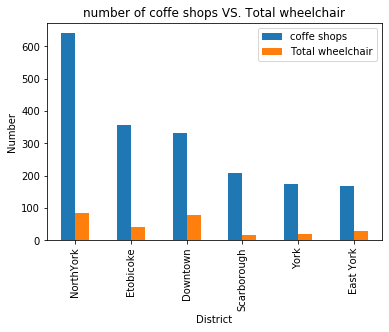

In [71]:
df_desending.plot(x="District", y=["coffe shops", "Total wheelchair"], kind="bar")

plt.title("number of coffe shops VS. Total wheelchair")
plt.xlabel("District")
plt.ylabel("Number")
plt.savefig("output_graph/bar_wheelchair")

**# of Coffe shops VS. Internet access**

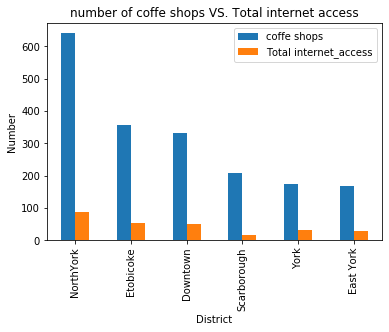

In [72]:
df_desending.plot(x="District", y=["coffe shops", "Total internet_access"], kind="bar")

plt.title("number of coffe shops VS. Total internet access")
plt.xlabel("District")
plt.ylabel("Number")
plt.savefig("output_graph/bar_internet_access")

**# of Coffe shops VS. Takeaway**

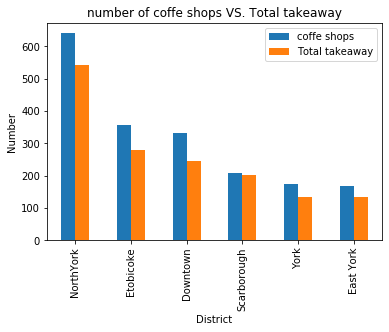

In [73]:
df_desending.plot(x="District", y=["coffe shops", "Total takeaway"], kind="bar")

plt.title("number of coffe shops VS. Total takeaway")
plt.xlabel("District")
plt.ylabel("Number")
plt.savefig("output_graph/bar_takeaway")

**# of Coffe shops VS. Amentites**

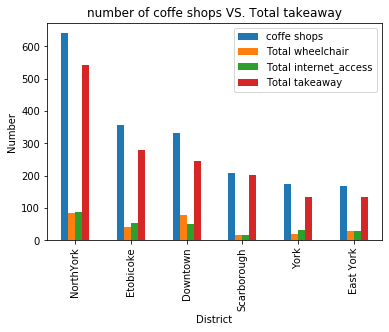

In [74]:
df_desending.plot(x="District", y=["coffe shops", "Total wheelchair", "Total internet_access", "Total takeaway"], kind="bar")

plt.title("number of coffe shops VS. Total takeaway")
plt.xlabel("District")
plt.ylabel("Number")
plt.savefig("output_graph/bar_All_Amentites")

**Percentage of each amenities in all district**

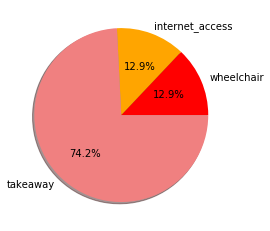

In [75]:
import matplotlib.pyplot as plt
import numpy as np
#Percentage of each facility in the East
# Labels for the sections of our pie chart
labels = ["wheelchair", "internet_access", "takeaway"]

# The values of each section of the pie chart
                    
Total_wheelchair = number_wheelchair_EY + number_wheelchair_Et + number_wheelchair_Ny + number_wheelchair_Sc + number_wheelchair_Dt + number_wheelchair_Yk
Total_internet_access = number_internet_access_EY + number_internet_access_Et + number_internet_access_Ny + number_internet_access_Sc + number_internet_access_Dt + number_internet_access_Yk
Total_takeaway = number_takeaway_EY + number_takeaway_Et + number_takeaway_Ny + number_takeaway_Sc + number_takeaway_Dt + number_takeaway_Yk

total_am = [Total_wheelchair, Total_internet_access, Total_takeaway]

# The colors of each section of the pie chart
colors = ["red", "orange", "lightcoral"]

# Tells matplotlib to separate the "Humans" section from the others
explode = (0, 0, 0)


plt.pie(total_am, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True)

plt.savefig("output_graph/pie_All_Amentites")